In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import seaborn as sns
import json
import torch
import pickle

import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "DeJavu Serif"


In [21]:
df_all = pd.DataFrame()

In [22]:
perp_folders = ["../output/10132023/"]

In [23]:

for perp_folder in perp_folders:
    files = os.listdir(perp_folder)
    files = [os.path.join(perp_folder, f) for f in files] # add path to each file
    files.sort(key=lambda x: os.path.getmtime(x), reverse=True)
    
    for file in files:        
        if "opposite" in file or "emb" in file or "predictions" in file or "proportions" in file:
            continue 
                
        if ".log" in file:
            continue
        print(file)
        method = file.split("/")[-1]
        
        runs = os.listdir(file)
        
        for run in runs:
            print(run)
            seed = int(run.split("seed_")[-1].split("_")[0])
            checkpoint = int(run.split("-")[-1].split(".")[0])
            if len(df_all) != 0:
                if len(df_all.loc[(df_all.method==method) & (df_all.seed == seed) & (df_all.index==checkpoint)]) != 0:
                    #print(f"already exists: {method}, {seed}, {checkpoint}")
                    continue 
                
            path = os.path.join(file, run)
            print(path)
                
            loss_dict = pd.read_pickle(path)
        
        
            df = pd.DataFrame([{"skill": k, "loss": [values.numpy() if torch.is_tensor(values) else values for values in v]} for k, v in loss_dict.items()])
            df["perplexity"] = pd.Series([np.exp(l) for l in df["loss"].values])
            df["average_loss"] = pd.Series([sum(l)/len(l) for l in df["loss"].values])
            df["average_perplexity"] = pd.Series([sum(p)/len(p) for p in df["perplexity"].values])
            df["method"] = method
            df["seed"] = seed
            df["checkpoint"] = checkpoint


            df.set_index("checkpoint", inplace=True)


            df_all = pd.concat([df_all, df])
    
#df_all.set_index("checkpoint", inplace=True)
#df_all = df_all.sort_index()

../output/10132023/ni_10000_stratified_top_23.txt_static
seed_4_checkpoint-1500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_4_checkpoint-1500.pkl


seed_0_checkpoint-2000.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_0_checkpoint-2000.pkl
seed_3_checkpoint-1500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_3_checkpoint-1500.pkl
seed_1_checkpoint-5000.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_1_checkpoint-5000.pkl
seed_2_checkpoint-500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_2_checkpoint-500.pkl
seed_1_checkpoint-2500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_1_checkpoint-2500.pkl
seed_2_checkpoint-1000.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_2_checkpoint-1000.pkl
seed_4_checkpoint-3500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_4_checkpoint-3500.pkl
seed_2_checkpoint-4500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_2_checkpoint-4500.pkl
seed_3_checkpoint-3500.pkl
../output/10132023/ni_10000_stratified_top_23.txt_static/seed_3_checkpoint-3500.pkl
see

In [24]:
def aggregate_task_category(x, ppl=True):
    if ppl:
        total_ppl = x["perplexity"].apply(lambda x: sum(x)).sum()
        count_ppl = x["perplexity"].apply(lambda x: len(x)).sum()
        metric_name = "skill_perplexity"
        metric = total_ppl/count_ppl
    else:
        total_loss = x["loss"].apply(lambda x: sum(x)).sum()
        count_loss = x["loss"].apply(lambda x: len(x)).sum()
        metric_name = "skill_loss"
        metric = total_loss/count_loss

    names = {metric_name: metric}
    
    return pd.Series(names, index=[metric_name])



In [25]:
sorted(df_all.method.unique())

['ni_10000_mixture_top_23.txt_top_23_early_decreases_static_eta_0.2',
 'ni_10000_stratified_top_23.txt_static']

In [26]:
method = "ni_10000_mixture_top_23.txt_top_23_early_decreases_static_eta_0.2"
uniform = "ni_10000_stratified_top_23.txt_static"

df_weighted = df_all.loc[df_all.method ==  uniform].sort_index()
print(df_weighted.seed.unique())
max_seed = df_weighted.seed.max()
print(df_weighted.loc[df_weighted.seed == max_seed].index.max())


[1 3 2 0 4]
5000


[1 3 2 0 4]
[Uniform] Mean loss per slice: 2.114195287214664
[Uniform] std on loss per slice: 0.001784527197308713
[Uniform] Mean loss per point: 2.5229989111773246
[Uniform] Max loss per slice : skill         sentiment_analysis
seed                           3
skill_loss              3.282337
Name: 5000, dtype: object
[3 4 0 1 2]
[Weighted] Mean loss per slice: 2.1030380704514124
[Weighted] std on loss per slice: 0.0010982612073708086
[Weighted] Mean loss per point: 2.447864117236359
[Weighted] Max loss per slice : skill         irony_detection
seed                        3
skill_loss           3.274708
Name: 5000, dtype: object
answer_verification
2.213506795059551
0.0037346149273556808
code_to_text
0.17017664909935915
0.0023512579871824047
discourse_connective_identification
2.8757339874903365
0.006362342585407729
entity_generation
1.4815878391265869
0.00723222599608985
entity_relation_classification
0.7985938628514607
0.003562084646488302
information_extraction
2.1636992102083954
0

Text(0.5, 0.98, 'ni_10000_mixture_top_23.txt_top_23_early_decreases_static_eta_0.2')

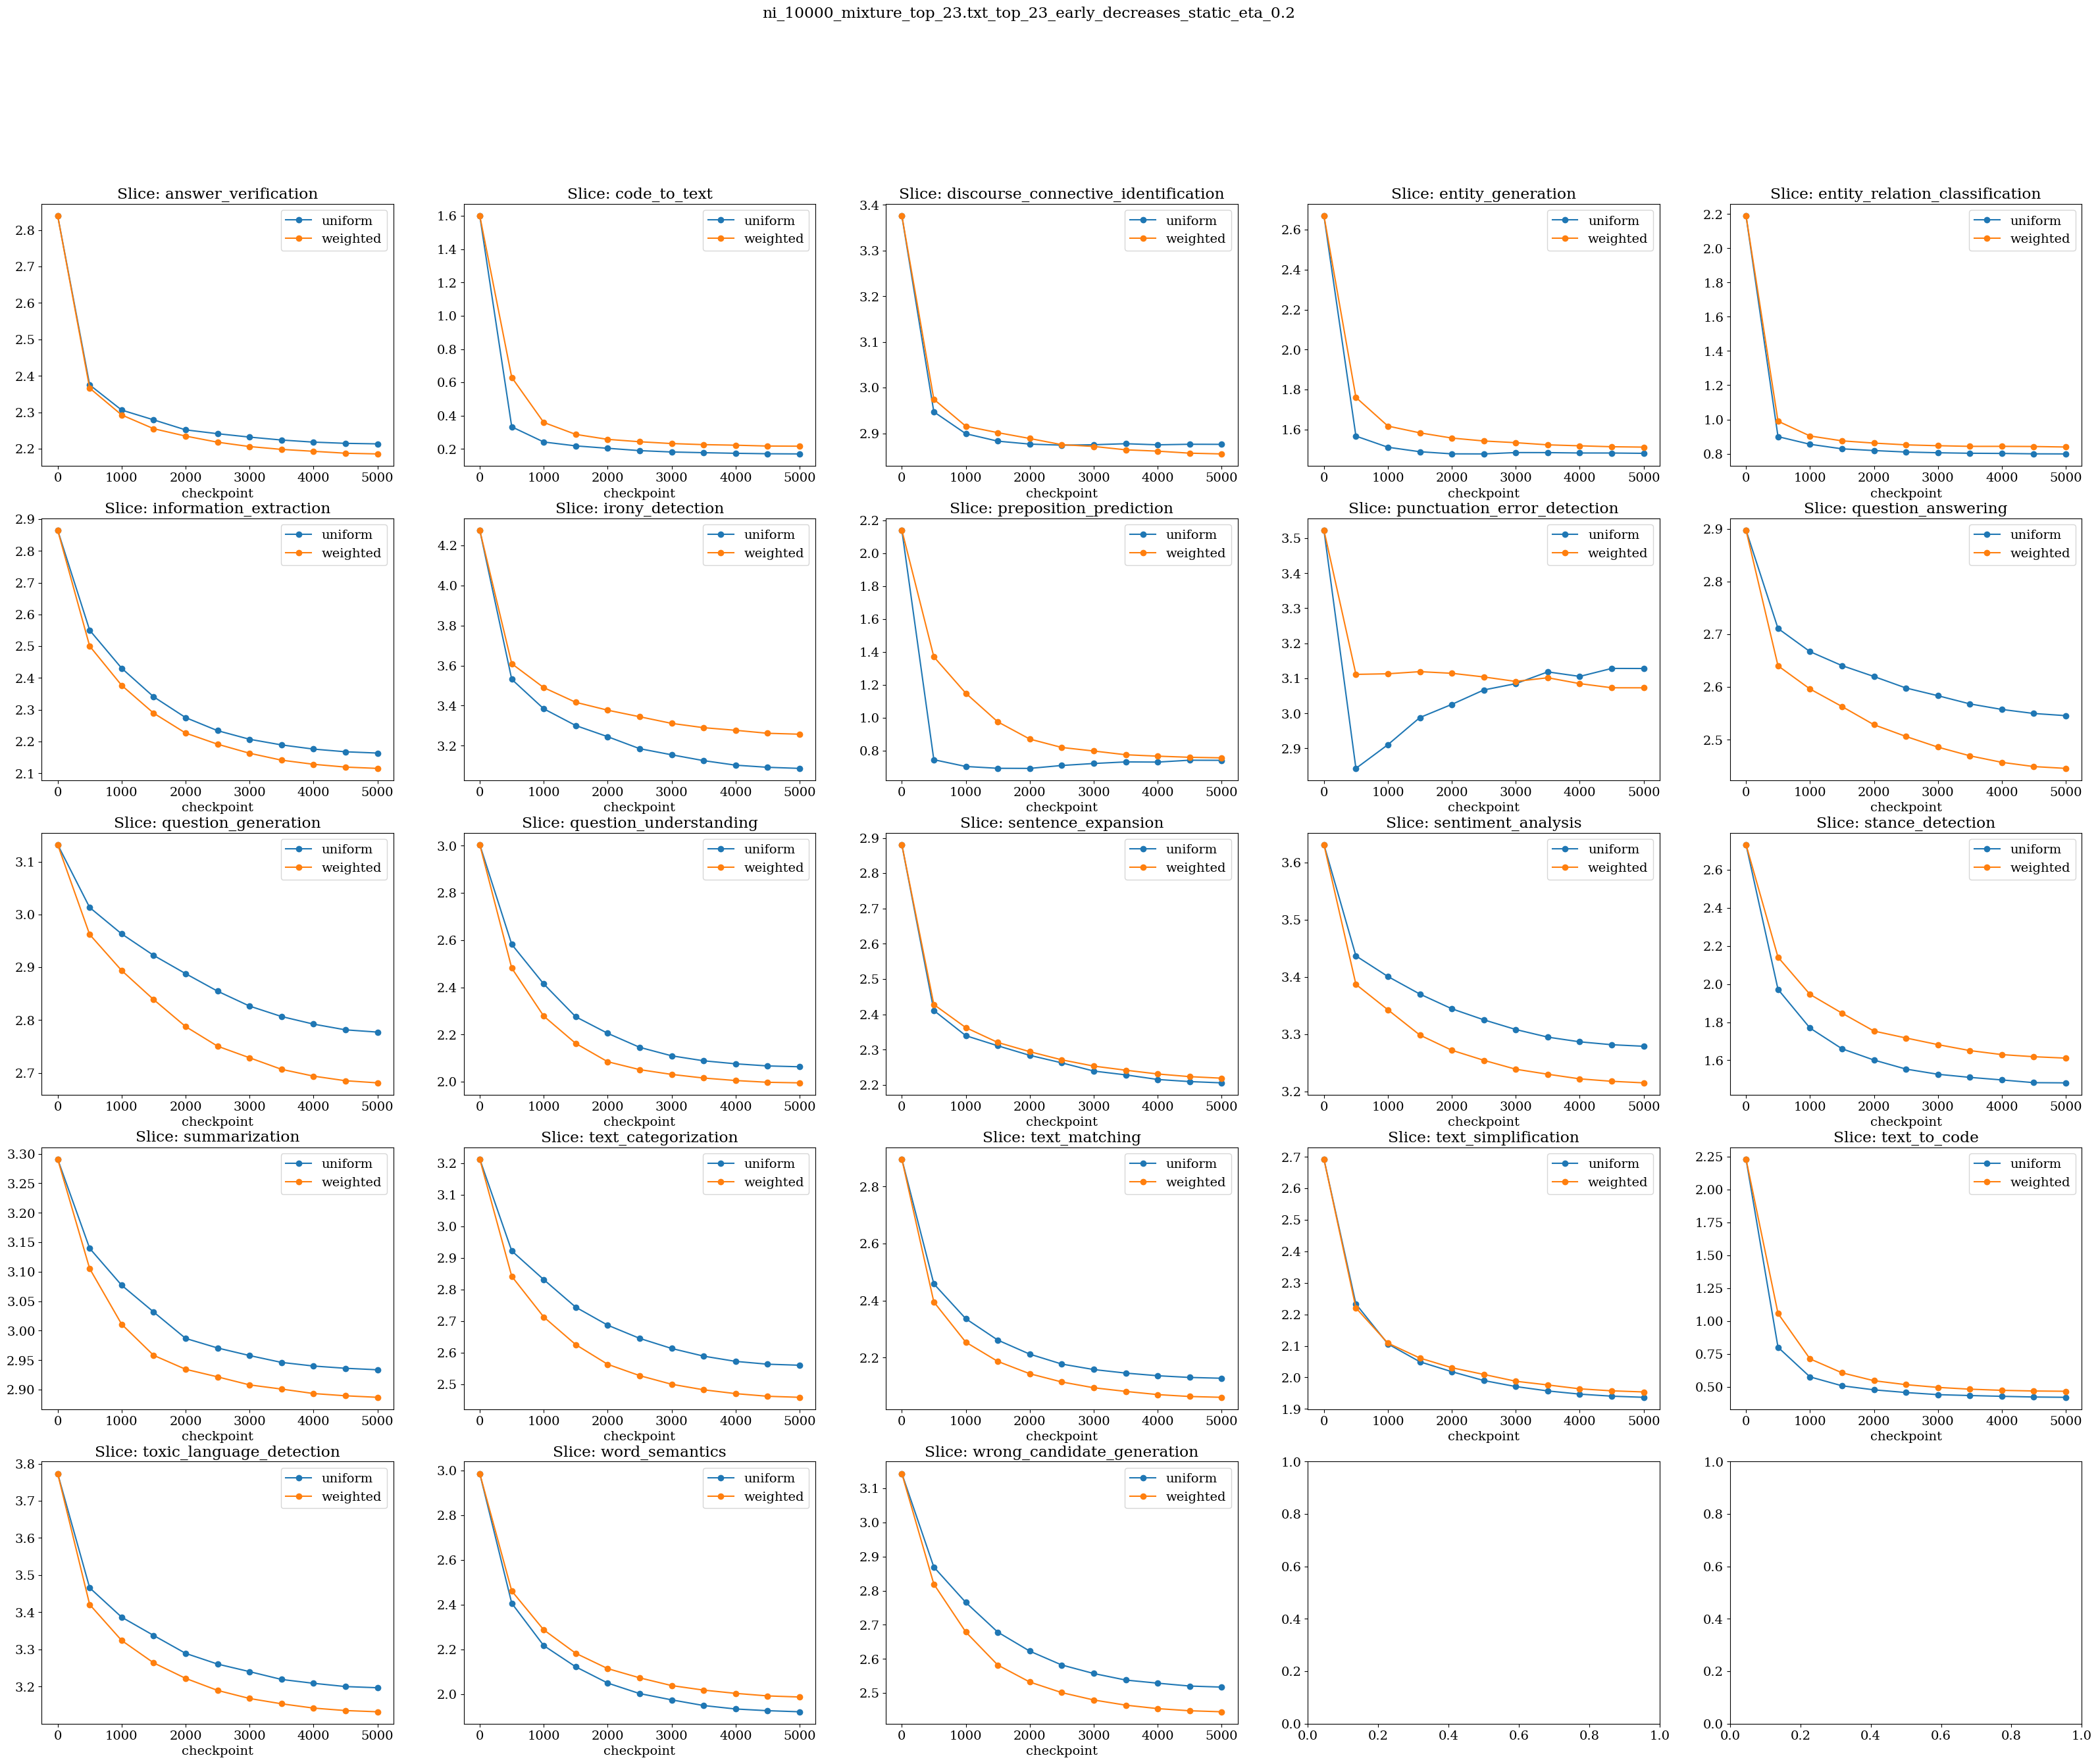

In [40]:


figure, axis = plt.subplots(5, 5, figsize=(40, 30))

seeds = [0, 1, 2, 3, 4]

df_shuffled = df_all.loc[df_all.method ==  uniform].sort_index()
print(df_shuffled.seed.unique())
df_shuffled = df_shuffled.loc[df_shuffled.seed.isin(seeds)]

df_shuffled_overall = df_shuffled.groupby([df_shuffled.index]).apply(lambda x: aggregate_task_category(x, ppl=False)).reset_index()
df_shuffled_overall.set_index("checkpoint", inplace=True)

df_shuffled = df_shuffled.groupby([df_shuffled.index, "skill", "seed"]).apply(lambda x: aggregate_task_category(x, ppl=False)).reset_index()
df_shuffled.set_index("checkpoint", inplace=True)
# df_shuffled = df_shuffled.loc[(df_shuffled.task_category != "Punctuation Error Detection".lower().replace(" ", "_")) & (df_shuffled.task_category != "Punctuation Error Detection")]

df_last = df_shuffled.loc[df_shuffled.index == df_shuffled.index.max()]

# print(f"[Uniform] Mean loss per slice: {df_last.task_category_loss.mean()}")
print(f"[Uniform] Mean loss per slice: {df_last.groupby('seed').skill_loss.mean().mean()}")
print(f"[Uniform] std on loss per slice: {df_last.groupby('seed').skill_loss.mean().std()}")

print(f"[Uniform] Mean loss per point: {df_shuffled_overall.iloc[-1].values[0]}")
max_loss = df_last.skill_loss.argmax()
print(f"[Uniform] Max loss per slice : {df_last.iloc[max_loss]}")




df_weighted = df_all.loc[df_all.method ==  method].sort_index()
print(df_weighted.seed.unique())

df_weighted.skill = df_weighted.apply(lambda x: x.skill.lower().replace(" ", "_"), axis=1)

df_weighted = df_weighted.loc[df_weighted.seed.isin(seeds)]


df_weighted_overall = df_weighted.groupby([df_weighted.index]).apply(lambda x: aggregate_task_category(x, ppl=False)).reset_index()
df_weighted_overall.set_index("checkpoint", inplace=True)


df_weighted = df_weighted.groupby([df_weighted.index, "skill", "seed"]).apply(lambda x: aggregate_task_category(x, ppl=False)).reset_index()
df_weighted.set_index("checkpoint", inplace=True)


df_weighted_last = df_weighted.loc[df_weighted.index.max()]

print(f"[Weighted] Mean loss per slice: {df_weighted_last.groupby('seed').skill_loss.mean().mean()}")
print(f"[Weighted] std on loss per slice: {df_weighted_last.groupby('seed').skill_loss.mean().std()}")
print(f"[Weighted] Mean loss per point: {df_weighted_overall.iloc[-1].values[0]}")
max_loss = df_weighted_last.skill_loss.argmax()
print(f"[Weighted] Max loss per slice : {df_weighted_last.iloc[max_loss]}")



task_idxs = df_shuffled.skill.unique()

for idx, t in enumerate(task_idxs):
    i = int(idx / 5)
    j = int(idx % 5)
    df_task = df_shuffled.loc[(df_shuffled.skill == t)]
    df_task_weighted = df_weighted.loc[(df_weighted.skill == t.lower().replace(" ", "_")) | (df_weighted.skill == t)] 

    print(t)
    print(f"{df_task.loc[df_task.index.max()].groupby('seed').skill_loss.mean().mean()}")
    print(f"{df_task.loc[df_task.index.max()].groupby('seed').skill_loss.mean().std()}")


    df_task.groupby(df_task.index).skill_loss.mean().plot(marker="o", legend=True, label="uniform", ax=axis[i, j])

    df_task_weighted.groupby(df_task.index).skill_loss.mean().plot(marker="o", legend=True, label="weighted", ax=axis[i, j])

    axis[i, j].set_title(f"Slice: {t}")
plt.suptitle(method)